In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('building_solar_values.csv')
df = df.iloc[:, 1:]
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-04 07:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-04 07:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04 08:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04 08:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-04 08:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151781,2020-11-01 08:45:00,105.0,8.4,322.0,1.0,NaN,26.4,18.53,4.96,4.73,4.31,2.84,13.47
151782,2020-11-01 09:00:00,105.0,11.3,322.0,NaN,NaN,26.6,22.23,5.88,5.64,5.08,3.40,15.93
151783,2020-11-01 09:15:00,77.6,2.3,327.0,NaN,NaN,26.6,23.39,6.31,5.99,5.45,3.62,17.11
151784,2020-11-01 09:30:00,77.6,5.1,327.0,1.0,NaN,27.4,24.56,6.73,6.35,5.83,3.85,18.29


In [4]:
df = df.drop(columns=['Building0','Building1','Building3','Building4','Building5','Building6'])
df

,Date,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-04 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-04 07:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04 08:15:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-04 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
151781,2020-11-01 08:45:00,18.53,4.96,4.73,4.31,2.84,13.47
151782,2020-11-01 09:00:00,22.23,5.88,5.64,5.08,3.40,15.93
151783,2020-11-01 09:15:00,23.39,6.31,5.99,5.45,3.62,17.11
151784,2020-11-01 09:30:00,24.56,6.73,6.35,5.83,3.85,18.29


# Solar 0 graphs

In [5]:
Solar0 = df.drop(columns=['Solar1','Solar2','Solar3','Solar4','Solar5'])
Solar0

,Date,Solar0
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,18.53
151782,2020-11-01 09:00:00,22.23
151783,2020-11-01 09:15:00,23.39
151784,2020-11-01 09:30:00,24.56


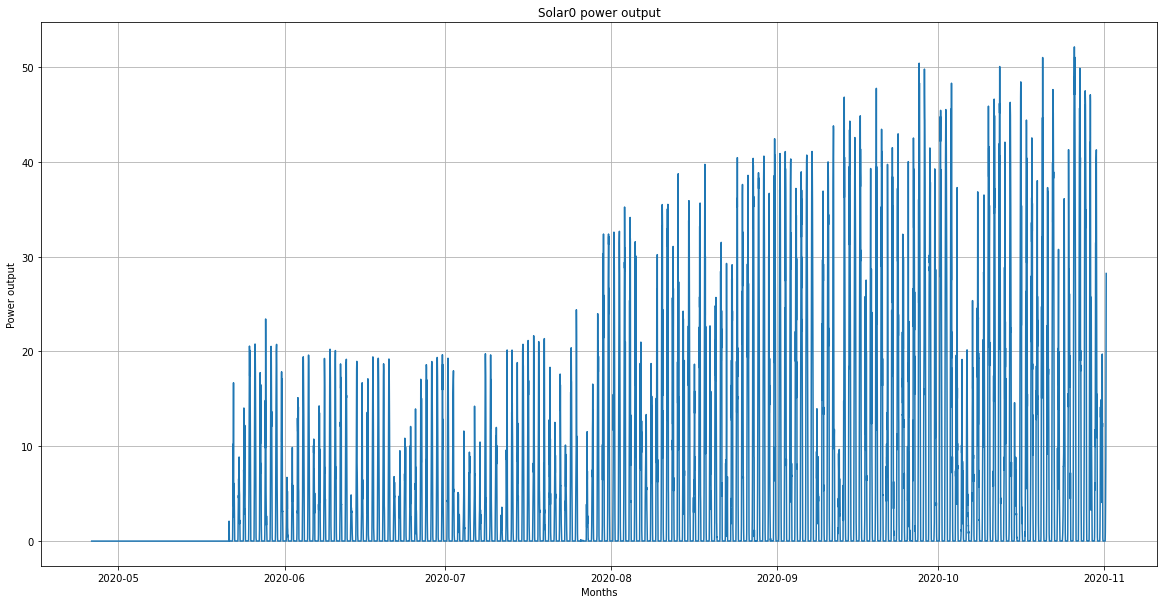

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(Solar0['Date'], Solar0['Solar0'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar0 power output')
plt.grid(True)
plt.show()

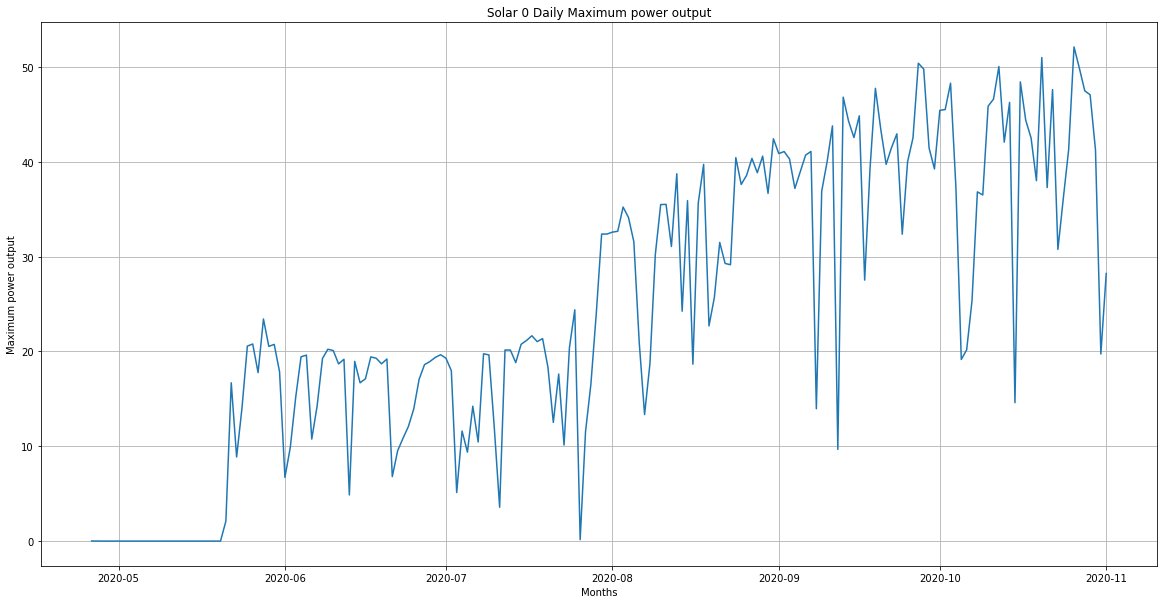

In [7]:
daily_max_values = Solar0.groupby(Solar0['Date'].dt.date)['Solar0'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(20, 10))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 0 Daily Maximum power output')
plt.grid(True)
plt.show()

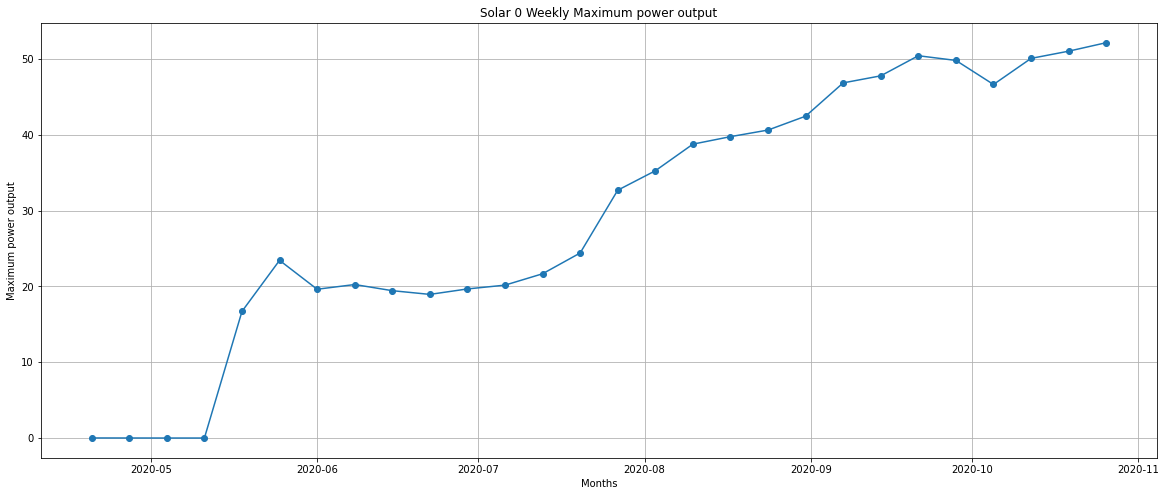

In [8]:
weekly_max_values = Solar0.groupby(Solar0['Date'].dt.to_period('W-SUN'))['Solar0'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 0 Weekly Maximum power output')
plt.grid(True)
plt.show()

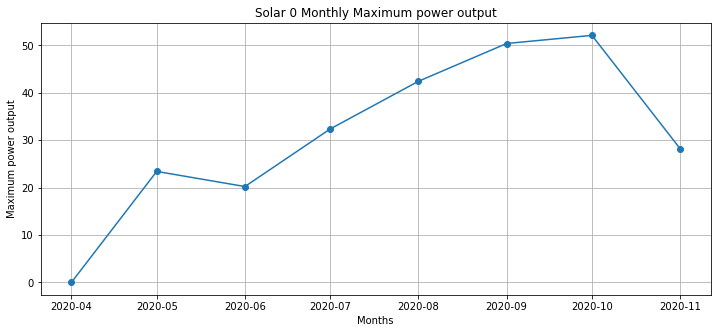

In [9]:
monthly_max_values = Solar0.groupby(Solar0['Date'].dt.to_period('M'))['Solar0'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 0 Monthly Maximum power output')
plt.grid(True)
plt.show()

# Solar 1 graphs

In [10]:
Solar1 = df.drop(columns=['Solar0','Solar2','Solar3','Solar4','Solar5'])
Solar1

,Date,Solar1
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,4.96
151782,2020-11-01 09:00:00,5.88
151783,2020-11-01 09:15:00,6.31
151784,2020-11-01 09:30:00,6.73


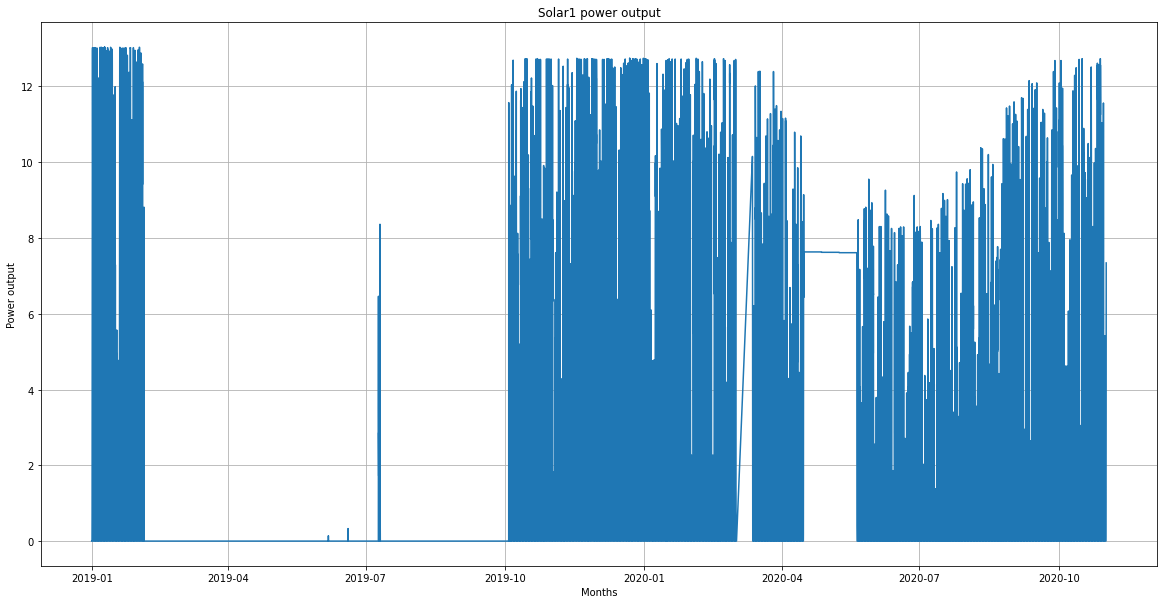

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(Solar1['Date'], Solar1['Solar1'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar1 power output')
plt.grid(True)
plt.show()

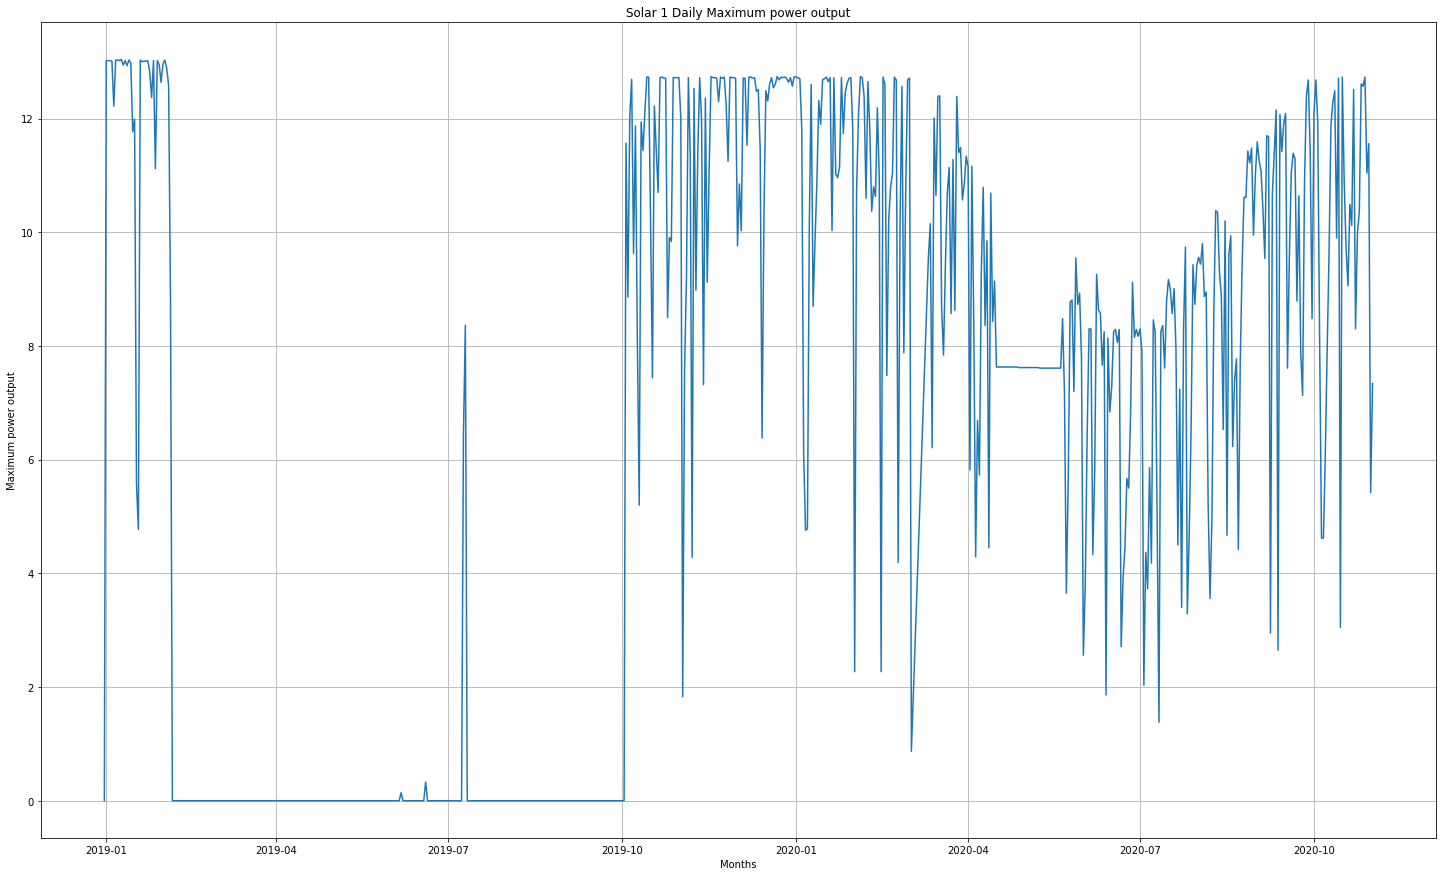

In [12]:
daily_max_values = Solar1.groupby(Solar1['Date'].dt.date)['Solar1'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(25, 15))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 1 Daily Maximum power output')
plt.grid(True)
plt.show()

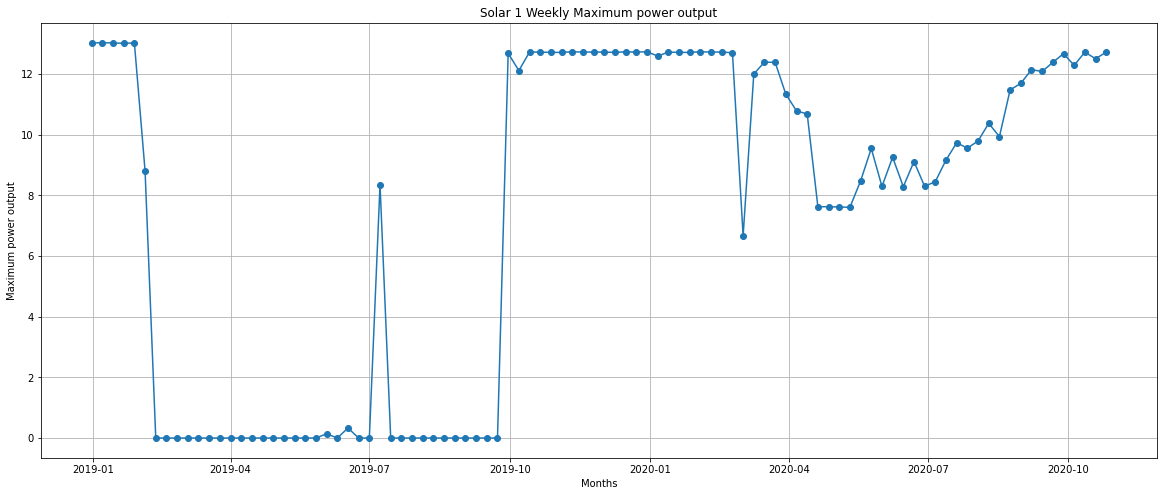

In [13]:
weekly_max_values = Solar1.groupby(Solar1['Date'].dt.to_period('W-SUN'))['Solar1'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 1 Weekly Maximum power output')
plt.grid(True)
plt.show()

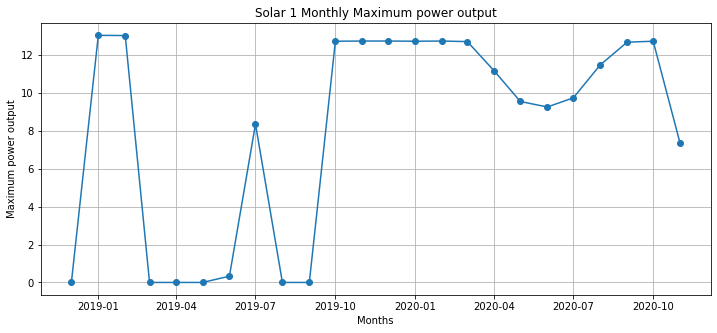

In [14]:
monthly_max_values = Solar1.groupby(Solar1['Date'].dt.to_period('M'))['Solar1'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 1 Monthly Maximum power output')
plt.grid(True)
plt.show()

# Solar 2 graphs

In [15]:
Solar2 = df.drop(columns=['Solar0','Solar1','Solar3','Solar4','Solar5'])
Solar2

,Date,Solar2
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,4.73
151782,2020-11-01 09:00:00,5.64
151783,2020-11-01 09:15:00,5.99
151784,2020-11-01 09:30:00,6.35


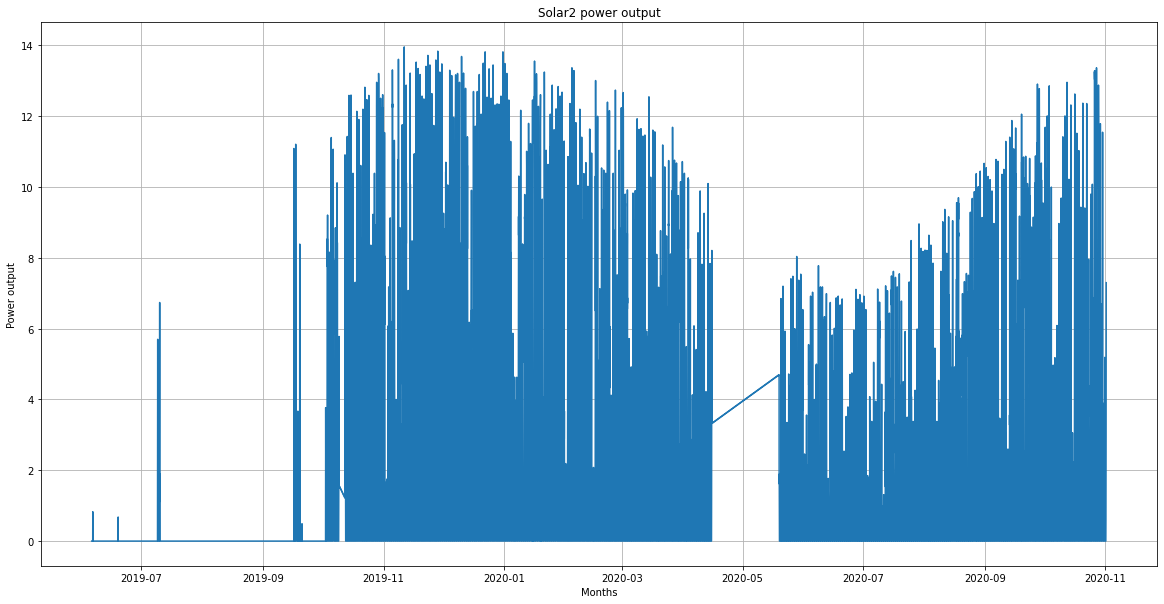

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(Solar2['Date'], Solar2['Solar2'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar2 power output')
plt.grid(True)
plt.show()

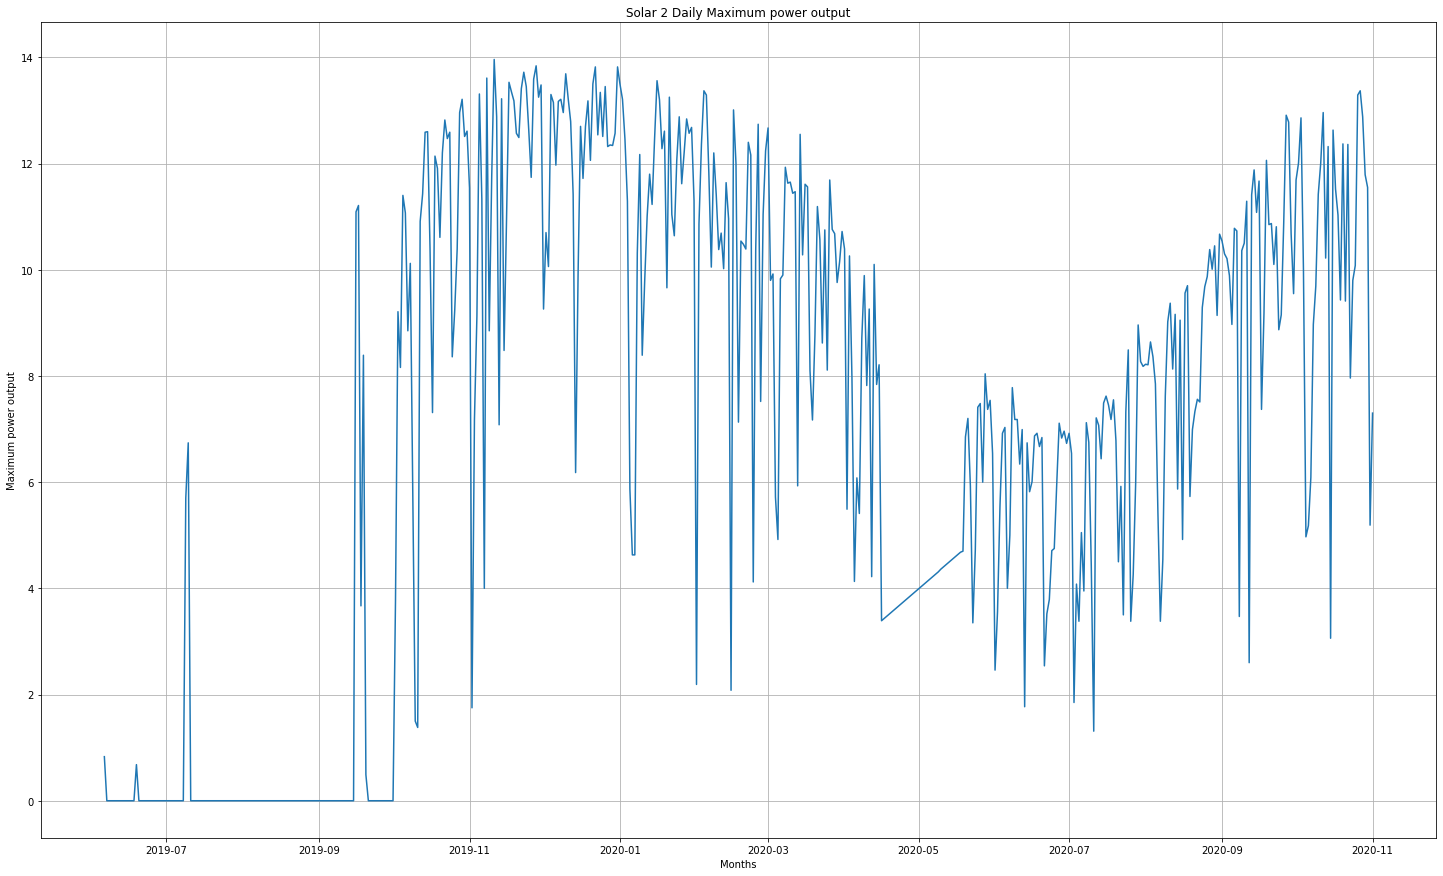

In [18]:
daily_max_values = Solar2.groupby(Solar2['Date'].dt.date)['Solar2'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(25, 15))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 2 Daily Maximum power output')
plt.grid(True)
plt.show()

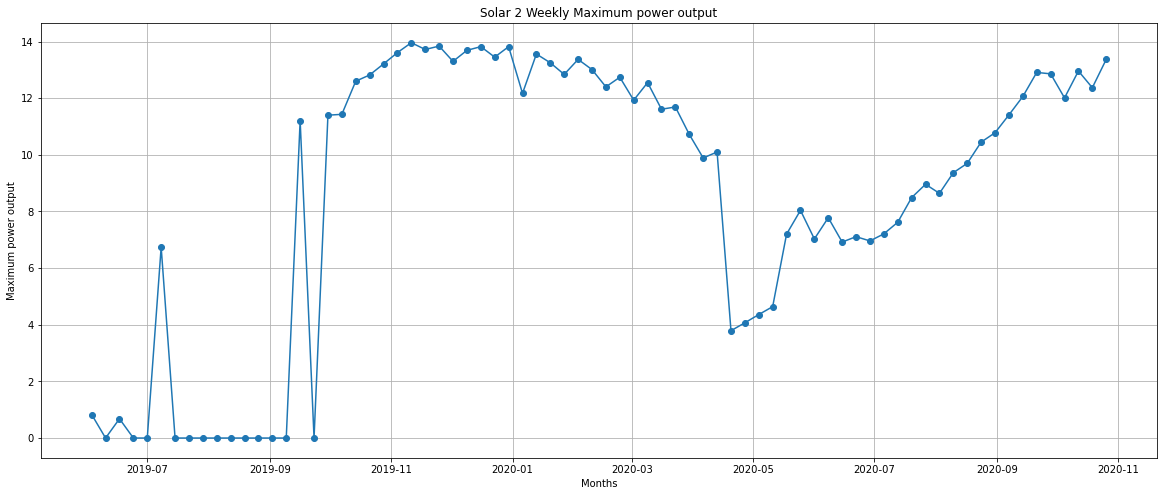

In [19]:
weekly_max_values = Solar2.groupby(Solar2['Date'].dt.to_period('W-SUN'))['Solar2'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 2 Weekly Maximum power output')
plt.grid(True)
plt.show()

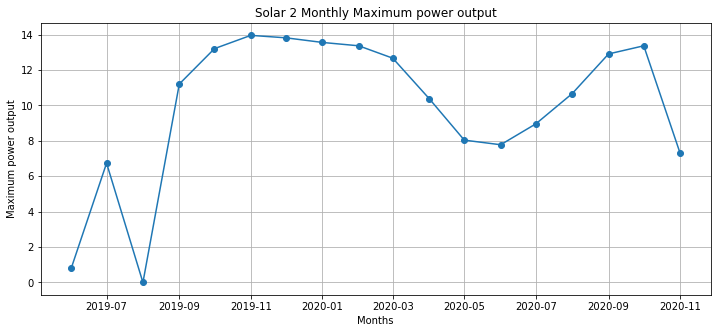

In [20]:
monthly_max_values = Solar2.groupby(Solar2['Date'].dt.to_period('M'))['Solar2'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 2 Monthly Maximum power output')
plt.grid(True)
plt.show()

# Solar 3 graphs

In [21]:
Solar3 = df.drop(columns=['Solar0','Solar1','Solar2','Solar4','Solar5'])
Solar3

,Date,Solar3
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,4.31
151782,2020-11-01 09:00:00,5.08
151783,2020-11-01 09:15:00,5.45
151784,2020-11-01 09:30:00,5.83


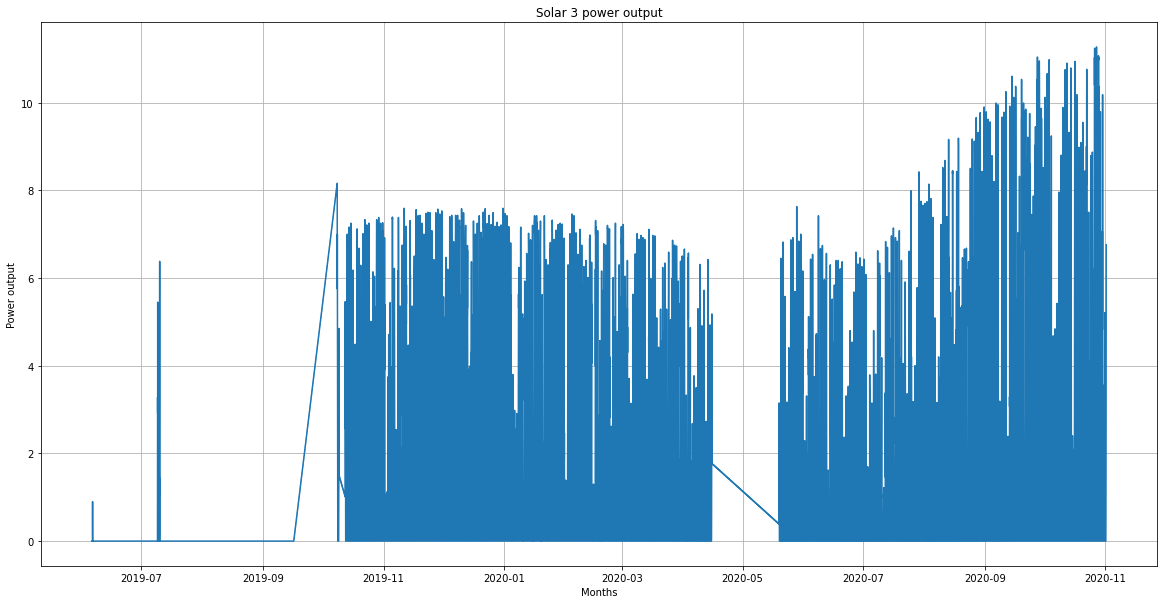

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(Solar3['Date'], Solar3['Solar3'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar 3 power output')
plt.grid(True)
plt.show()

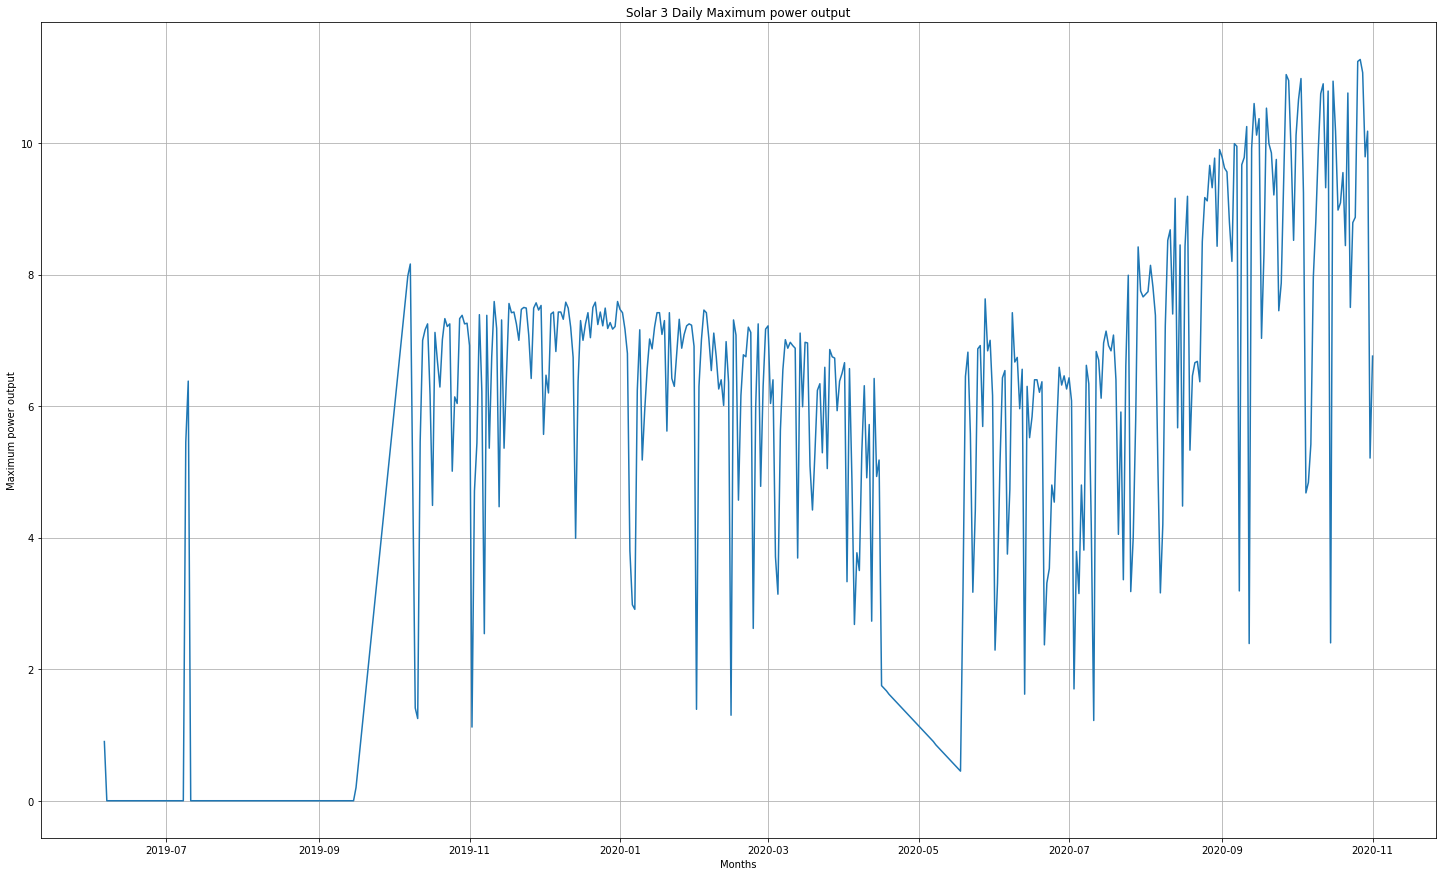

In [24]:
daily_max_values = Solar3.groupby(Solar3['Date'].dt.date)['Solar3'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(25, 15))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 3 Daily Maximum power output')
plt.grid(True)
plt.show()

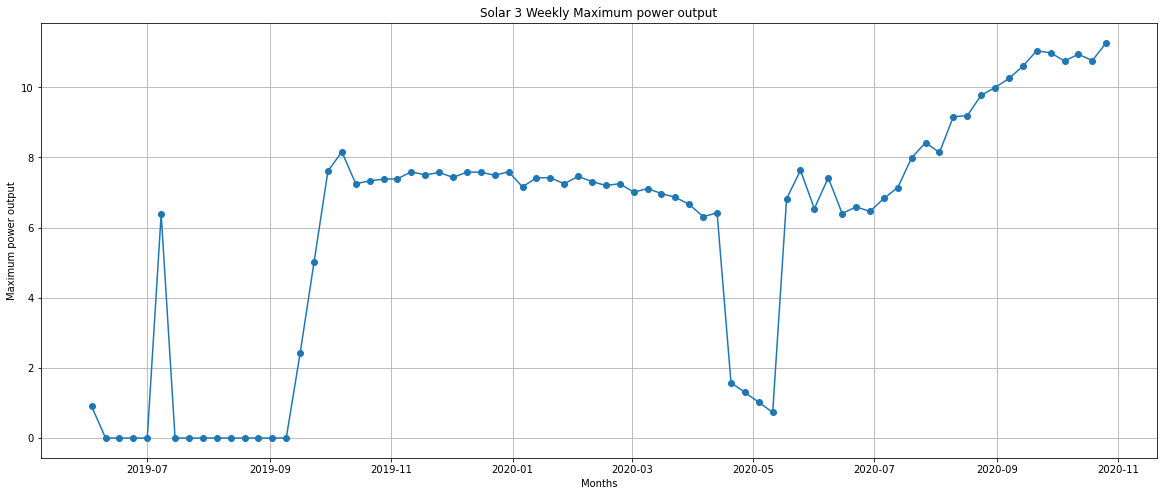

In [25]:
weekly_max_values = Solar3.groupby(Solar3['Date'].dt.to_period('W-SUN'))['Solar3'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 3 Weekly Maximum power output')
plt.grid(True)
plt.show()

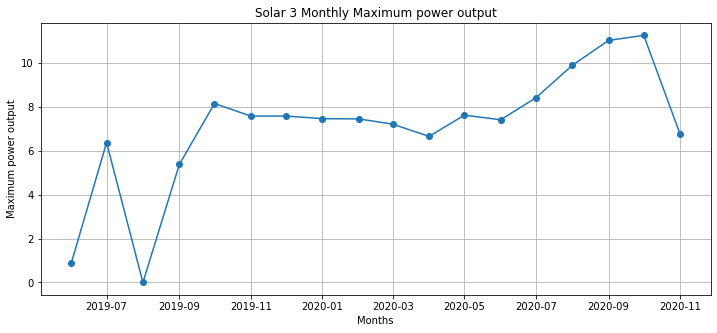

In [26]:
monthly_max_values = Solar3.groupby(Solar3['Date'].dt.to_period('M'))['Solar3'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 3 Monthly Maximum power output')
plt.grid(True)
plt.show()

# Solar 4 graphs

In [27]:
Solar4 = df.drop(columns=['Solar0','Solar1','Solar2','Solar3','Solar5'])
Solar4

,Date,Solar4
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,2.84
151782,2020-11-01 09:00:00,3.40
151783,2020-11-01 09:15:00,3.62
151784,2020-11-01 09:30:00,3.85


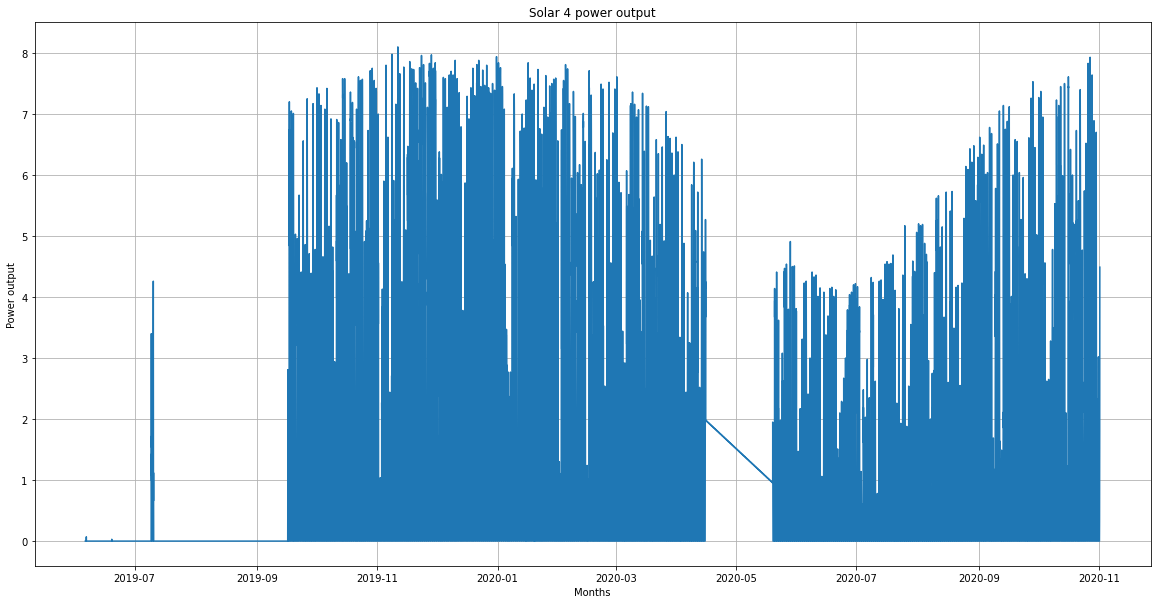

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(Solar4['Date'], Solar4['Solar4'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar 4 power output')
plt.grid(True)
plt.show()

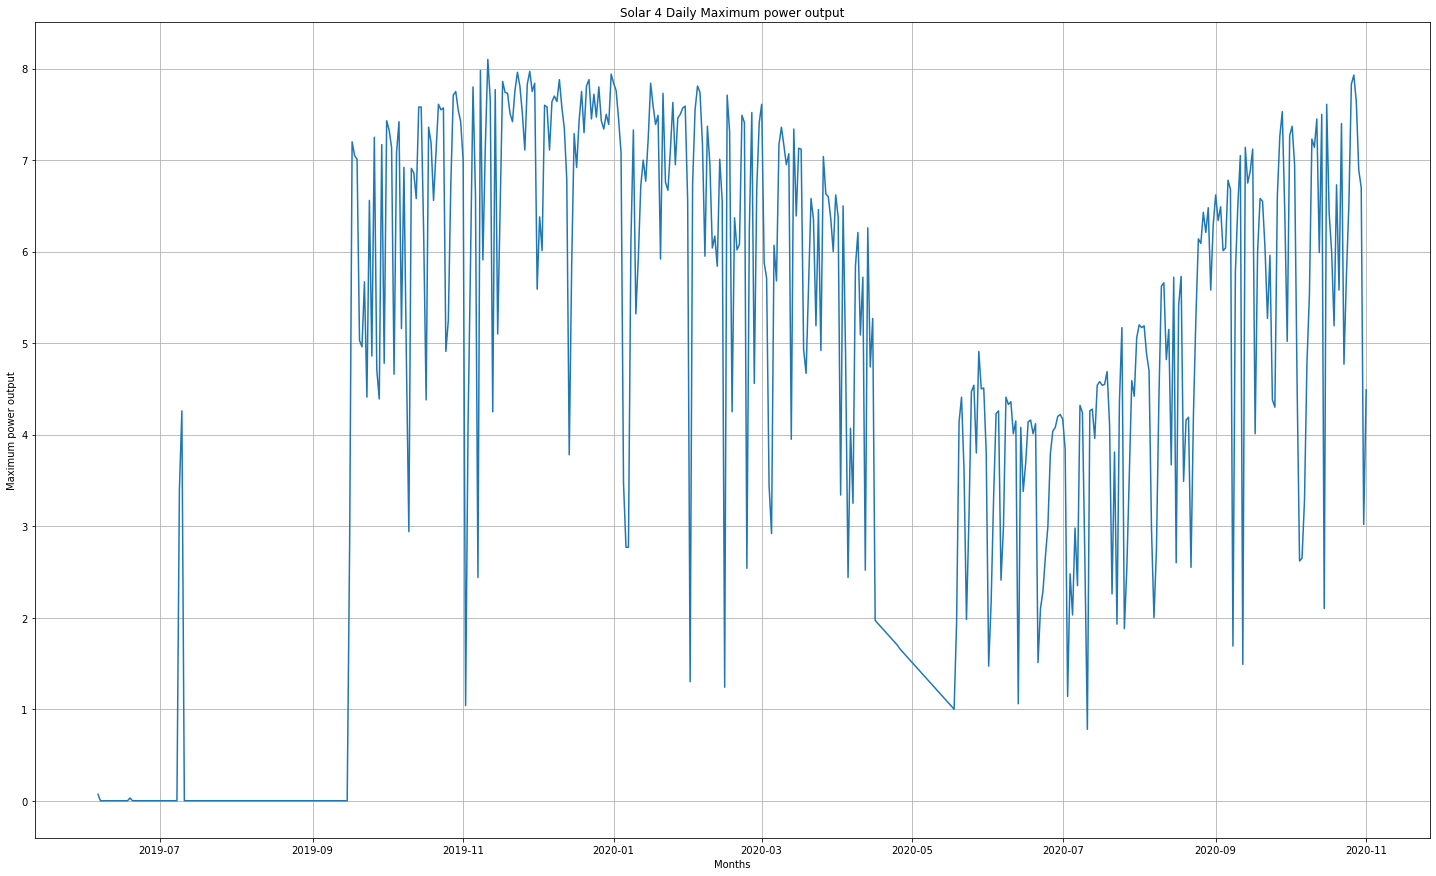

In [30]:
daily_max_values = Solar4.groupby(Solar4['Date'].dt.date)['Solar4'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(25, 15))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 4 Daily Maximum power output')
plt.grid(True)
plt.show()

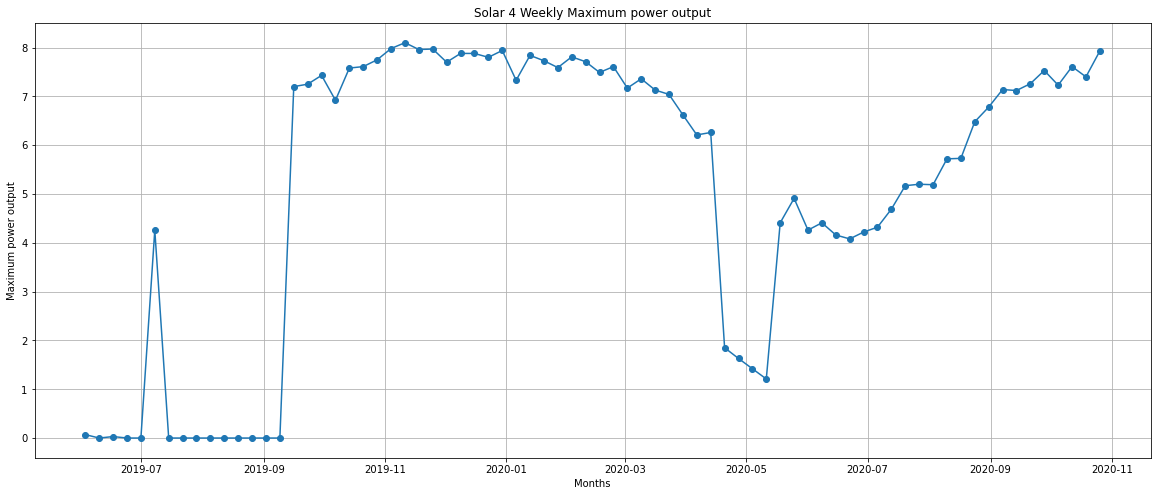

In [31]:
weekly_max_values = Solar4.groupby(Solar4['Date'].dt.to_period('W-SUN'))['Solar4'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 4 Weekly Maximum power output')
plt.grid(True)
plt.show()

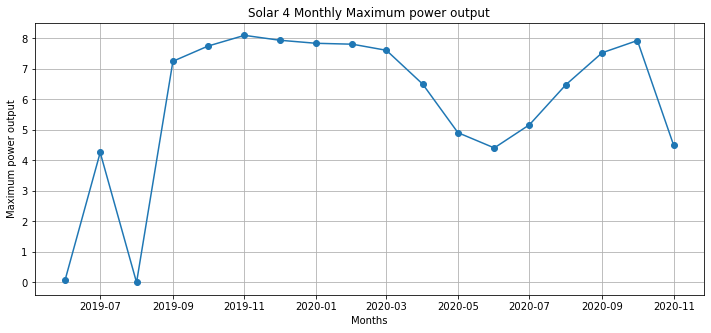

In [32]:
monthly_max_values = Solar4.groupby(Solar4['Date'].dt.to_period('M'))['Solar4'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 4 Monthly Maximum power output')
plt.grid(True)
plt.show()

# Solar 5 graphs

In [33]:
Solar5 = df.drop(columns=['Solar0','Solar1','Solar2','Solar3','Solar4'])
Solar5

,Date,Solar5
0,2016-07-04 07:30:00,NaN
1,2016-07-04 07:45:00,NaN
2,2016-07-04 08:00:00,NaN
3,2016-07-04 08:15:00,NaN
4,2016-07-04 08:30:00,NaN
...,...,...
151781,2020-11-01 08:45:00,13.47
151782,2020-11-01 09:00:00,15.93
151783,2020-11-01 09:15:00,17.11
151784,2020-11-01 09:30:00,18.29


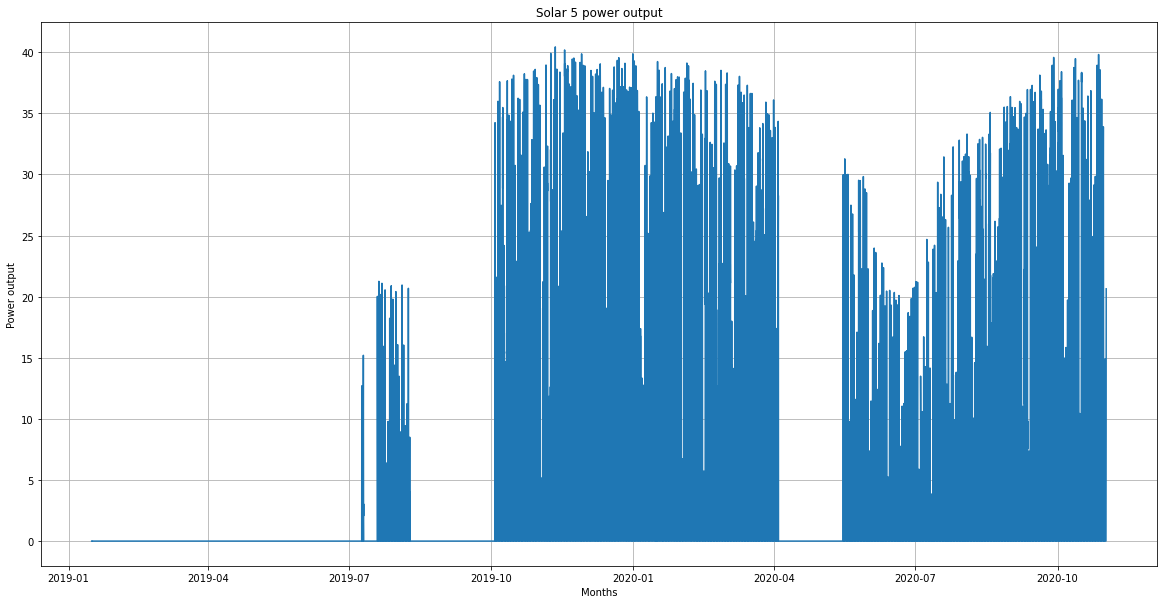

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(Solar5['Date'], Solar5['Solar5'])
plt.xlabel('Months')
plt.ylabel('Power output')
plt.title('Solar 5 power output')
plt.grid(True)
plt.show()

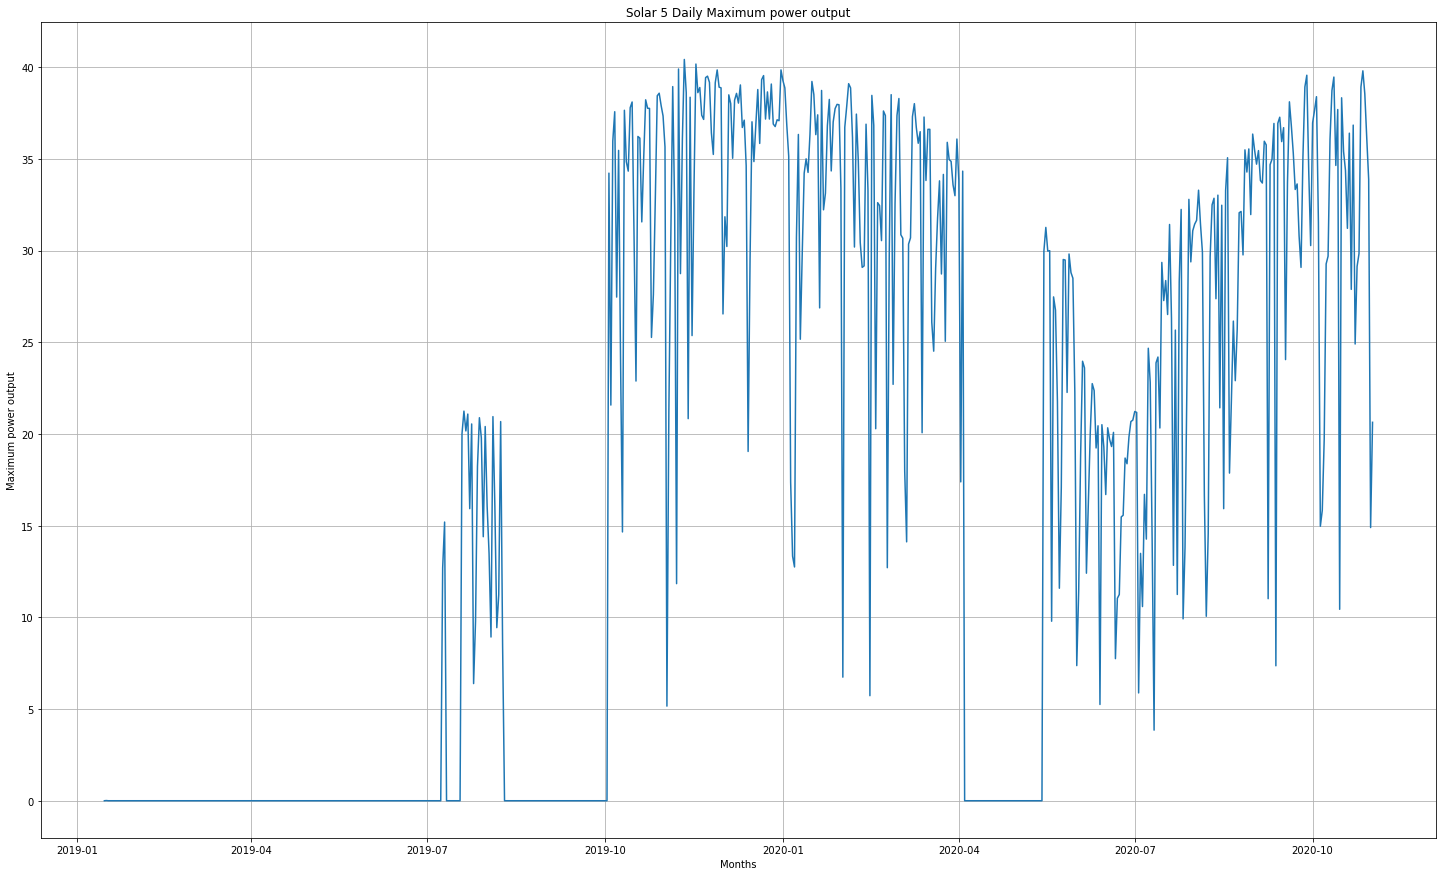

In [36]:
daily_max_values = Solar5.groupby(Solar5['Date'].dt.date)['Solar5'].max()
daily_max_values.index = pd.to_datetime(daily_max_values.index)

plt.figure(figsize=(25, 15))
plt.plot(daily_max_values.index, daily_max_values)
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 5 Daily Maximum power output')
plt.grid(True)
plt.show()

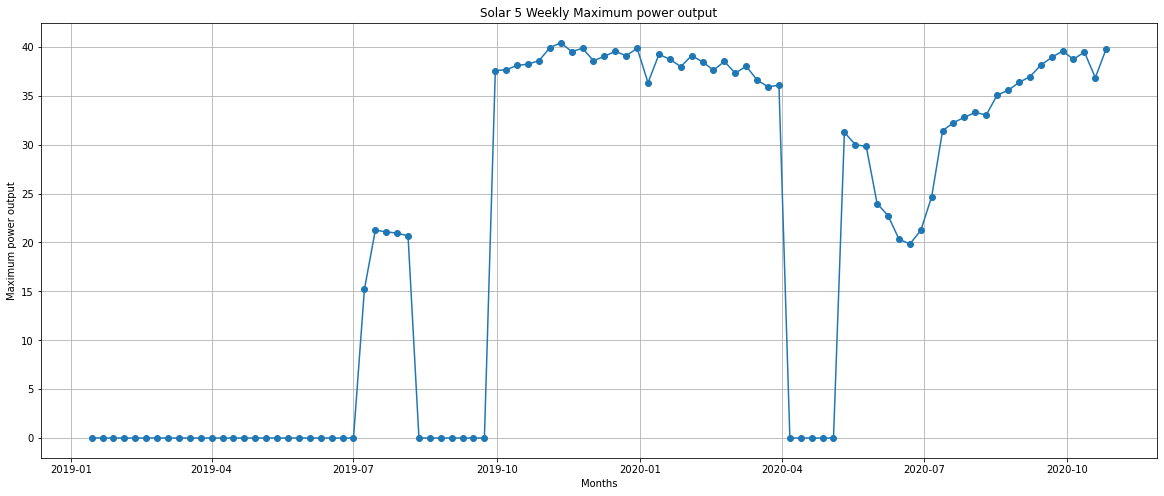

In [37]:
weekly_max_values = Solar5.groupby(Solar5['Date'].dt.to_period('W-SUN'))['Solar5'].max()
weekly_max_values.index = weekly_max_values.index.to_timestamp()

plt.figure(figsize=(20, 8))
plt.plot(weekly_max_values.index, weekly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 5 Weekly Maximum power output')
plt.grid(True)
plt.show()

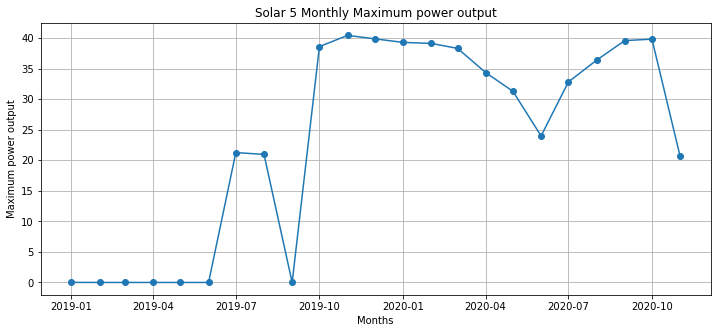

In [38]:
monthly_max_values = Solar5.groupby(Solar5['Date'].dt.to_period('M'))['Solar5'].max()
monthly_max_values.index = monthly_max_values.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly_max_values.index, monthly_max_values, marker='o')
plt.xlabel('Months')
plt.ylabel('Maximum power output')
plt.title('Solar 5 Monthly Maximum power output')
plt.grid(True)
plt.show()